In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 9)

import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [3]:
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.describe().T #If i want to show the same one but in the other side, i can use T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [8]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

[Text(0, 0, '5000')]

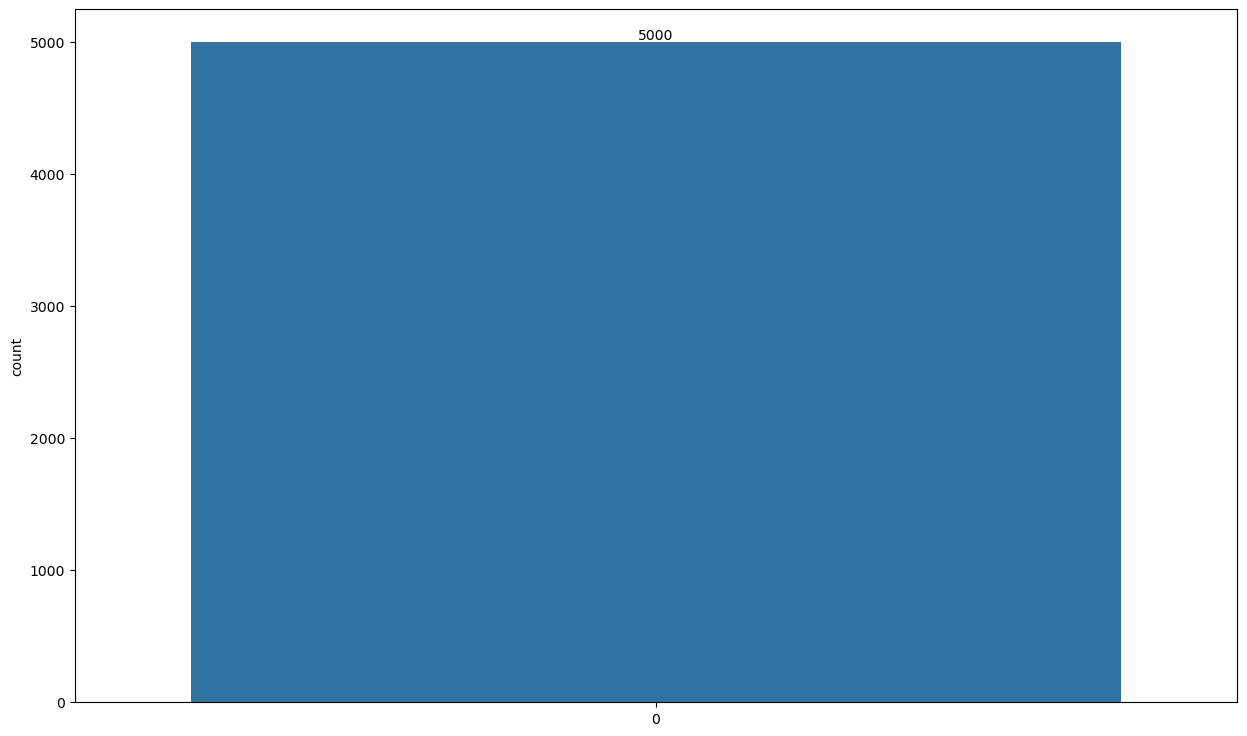

In [10]:
ax = sns.countplot(df['test_result'])
ax.bar_label(ax.containers[0])

<Axes: xlabel='test_result', ylabel='age'>

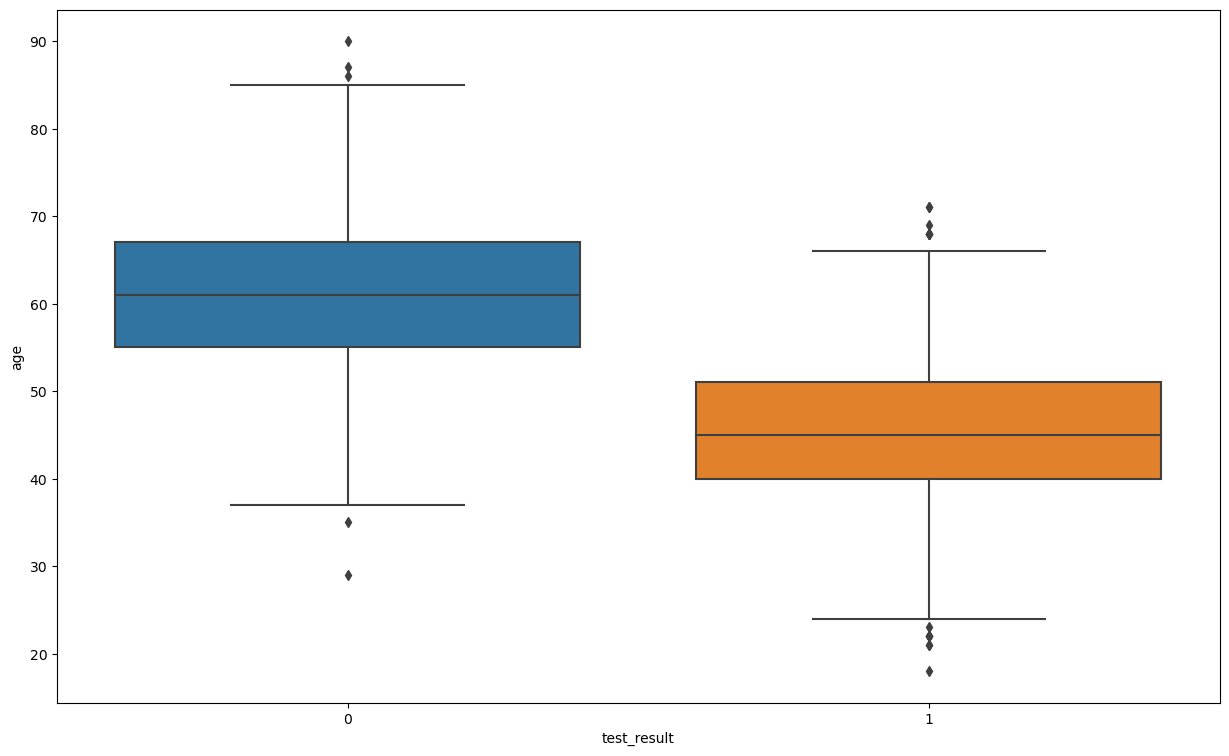

In [13]:
sns.boxplot(x='test_result', y = 'age', data=df)

In [14]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

<Axes: xlabel='test_result', ylabel='physical_score'>

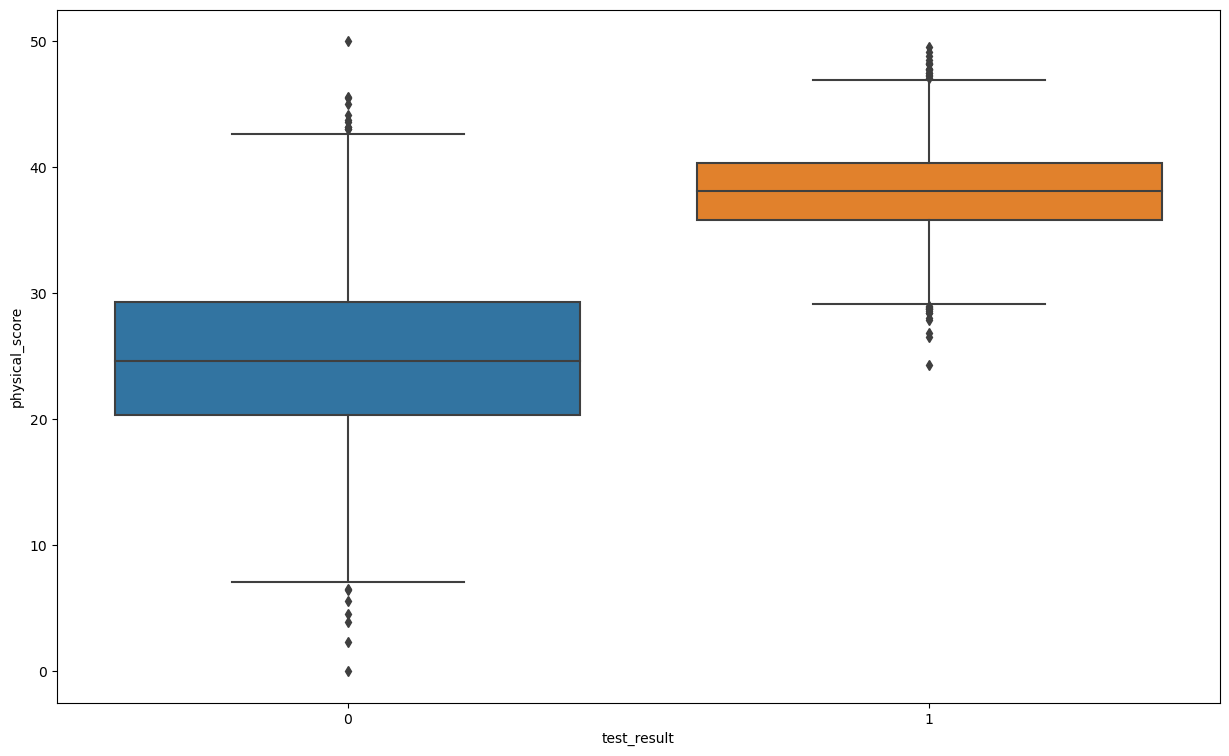

In [15]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

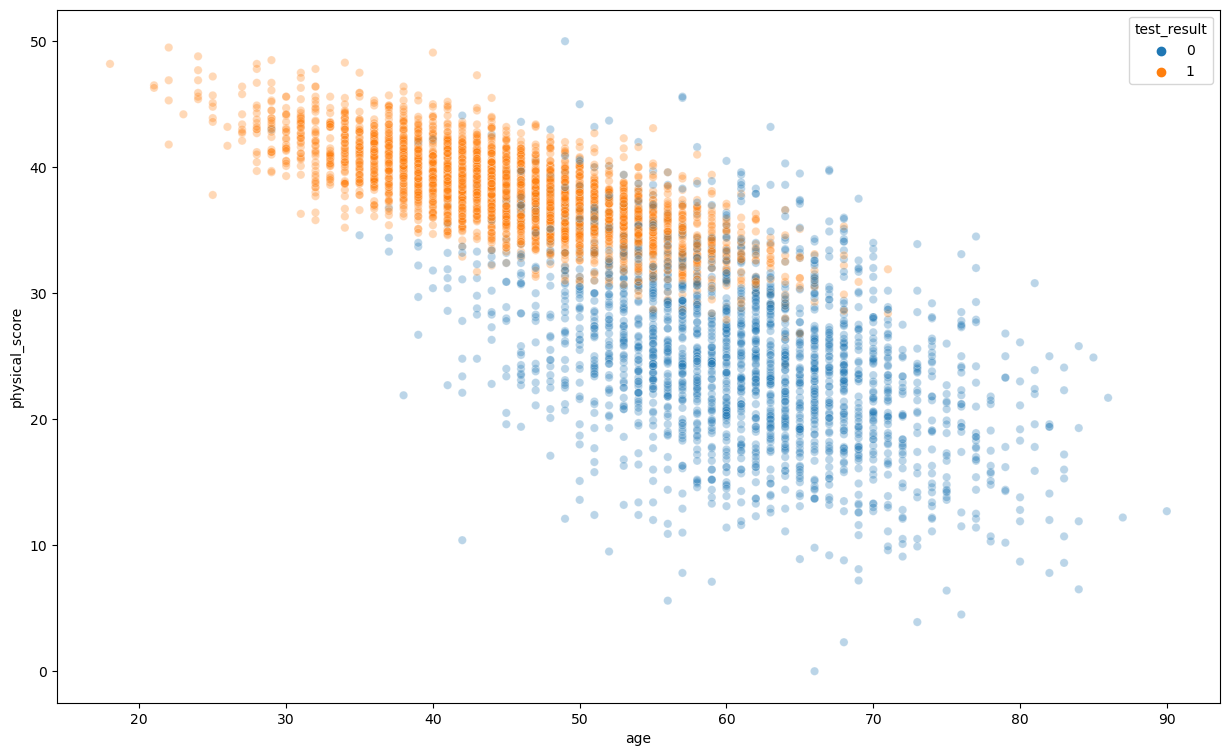

In [16]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.3)

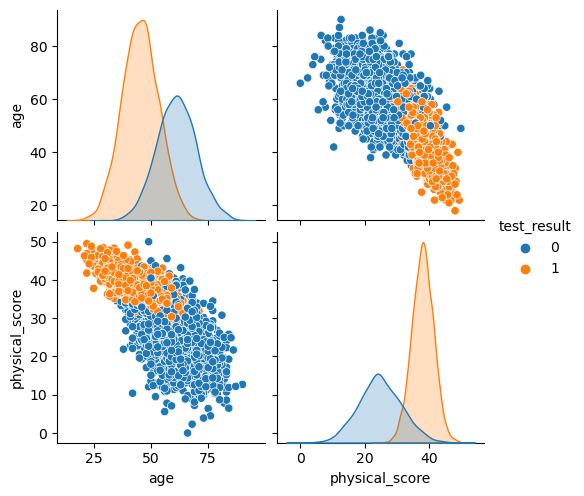

In [17]:
sns.pairplot(df, hue='test_result')

<Axes: >

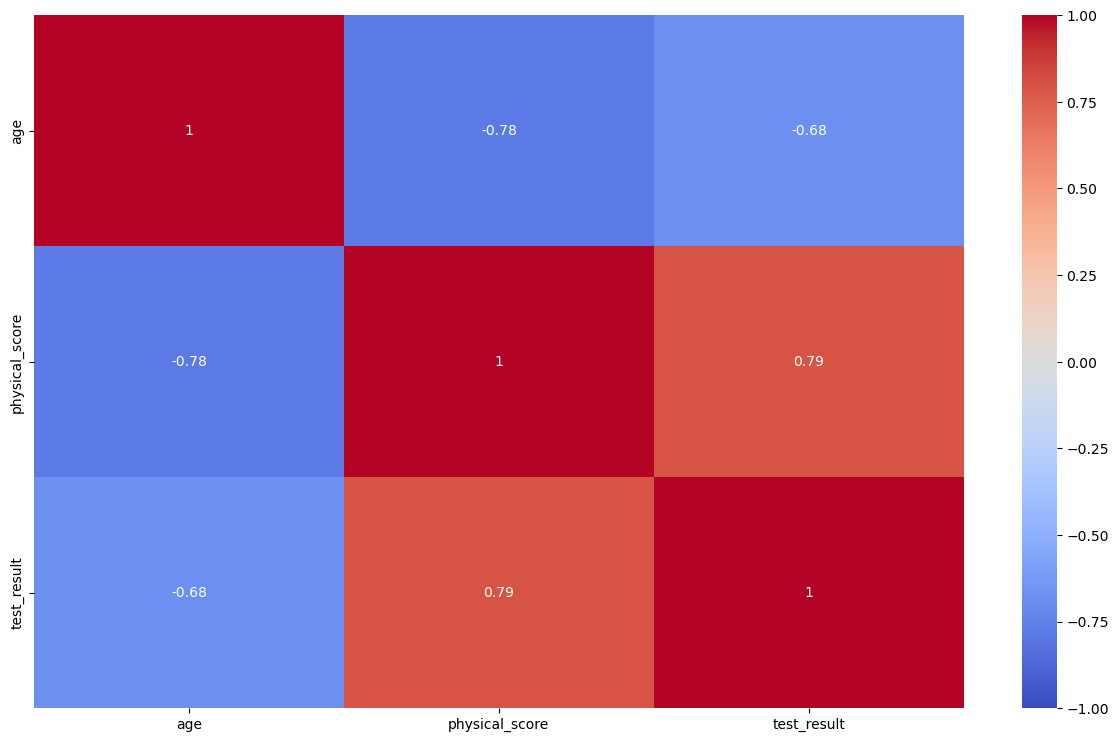

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## Train, Test, Split

In [22]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [24]:
X.head()

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9


In [25]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: test_result, dtype: int64

In [26]:
X.shape

(5000, 2)

In [27]:
y.shape

(5000,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [31]:
X_train.head()

,age,physical_score
141,32.0,43.0
4755,62.0,27.7
4886,40.0,49.1
2304,67.0,27.3
2727,53.0,35.3


In [33]:
X_test.head()

,age,physical_score
1718,39.0,37.8
2511,45.0,38.7
345,56.0,21.8
2521,40.0,44.0
54,64.0,25.4


In [34]:
y_train.head()

141     1
4755    0
4886    1
2304    0
2727    1
Name: test_result, dtype: int64

In [35]:
y_test.head()

1718    1
2511    1
345     0
2521    1
54      0
Name: test_result, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

## Modeling State

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

## Interpretation of coefficients

In [44]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [45]:
log_model.coef_

array([[-0.08365972,  0.43251827]])

In [46]:
log_model.intercept_

array([-9.35047287])

In [47]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.08365972134083335
b1 (physical_score) : 0.43251826524592085


In [50]:
b0 = log_model.intercept_[0]

In [51]:
print("b0 (intercept) :", b0)

b0 (intercept) : -9.350472872727675


In [52]:
def sigmoid(age, physical_score):

    log_odds = b2*age + b1*physical_score + b0 # b2*X2 + b1*X1 + b0
    probability = 1 / (1+np.exp(-log_odds))
    return probability

# Logistic regression converts classical linear regression equation (b2*X2 + b1*X1 +b0) 
# into probability using the above function.

In [53]:
probability_age_30 = sigmoid(30, 40)
probability_age_30

0.9956812711958833

In [57]:
probability_age_20 = sigmoid(20, 45)
probability_age_20

0.999783921920828

In [58]:
from sklearn.pipeline import Pipeline

In [61]:
operations = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [62]:
pipe_model['logistic'].coef_

array([[-0.94953524,  3.45991194]])

In [63]:
pipe_model['logistic'].intercept_

array([0.48867341])

In [64]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [65]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [66]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [67]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.0,37.8,1
2511,45.0,38.7,1
345,56.0,21.8,0
2521,40.0,44.0,1
54,64.0,25.4,0
...,...,...,...
4770,46.0,37.7,1
188,59.0,36.5,1
3335,54.0,22.8,0
4583,58.0,20.5,0


In [68]:
test_data['pred_proba'] = y_pred_proba[:, 1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.0,37.8,1,0.976157
2511,45.0,38.7,1,0.973076
345,56.0,21.8,0,0.010806
2521,40.0,44.0,1,0.998092
54,64.0,25.4,0,0.024987
...,...,...,...,...
4770,46.0,37.7,1,0.955993
188,59.0,36.5,1,0.813195
3335,54.0,22.8,0,0.019392
4583,58.0,20.5,0,0.005285


In [69]:
test_data['pred'] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.0,37.8,1,0.976157,1
2511,45.0,38.7,1,0.973076,1
345,56.0,21.8,0,0.010806,0
2521,40.0,44.0,1,0.998092,1
54,64.0,25.4,0,0.024987,0
...,...,...,...,...,...
4770,46.0,37.7,1,0.955993,1
188,59.0,36.5,1,0.813195,1
3335,54.0,22.8,0,0.019392,0
4583,58.0,20.5,0,0.005285,0


## Model performance with Classification 

In [70]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [71]:
accuracy_score(y_test, y_pred)

0.93

In [72]:
pipe_model.score(X_test, y_test)

0.93

In [76]:
precision_score(y_test, y_pred, pos_label=1)

0.9331210191082803

In [77]:
recall_score(y_test, y_pred, pos_label=1)

0.9543973941368078

In [78]:
f1_score(y_test, y_pred, pos_label=1)

0.9436392914653785

In [85]:
# from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\habob\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [86]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [90]:
# ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test, normalize='all')
ConfusionMatrixDisplay.from_estimator(piple_mode, X_test, y_pred, normalize='all')

NameError: name 'ConfusionMatrixDisplay' is not defined

In [91]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [92]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## Cross Validation

In [94]:
from sklearn.model_selection import cross_validate

In [101]:
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'],  cv = 10, return_train_score=True)

In [102]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.016454,0.024404,0.900000,0.915802,0.889273,0.915072,0.951852,0.947173,0.919499,0.930846
2,0.026650,0.024579,0.924444,0.912346,0.921429,0.911952,0.955556,0.944697,0.938182,0.928036
3,0.025016,0.032555,0.935556,0.911358,0.916955,0.912470,0.981481,0.942220,0.948122,0.927107
4,0.022187,0.024183,0.931111,0.912099,0.937500,0.911624,0.947955,0.944719,0.942699,0.927877
5,0.024375,0.024527,0.937778,0.911111,0.941392,0.911483,0.955390,0.943069,0.948339,0.927007
6,0.026236,0.016208,0.902222,0.916296,0.934363,0.915504,0.899628,0.947607,0.916667,0.931279
7,0.028564,0.022302,0.897778,0.916296,0.888502,0.916833,0.947955,0.945957,0.917266,0.931168
8,0.032973,0.024329,0.911111,0.914321,0.896194,0.913580,0.962825,0.946370,0.928315,0.929686
9,0.024530,0.016412,0.891111,0.916296,0.910448,0.916168,0.907063,0.946782,0.908752,0.931223
10,0.024395,0.024139,0.915556,0.914074,0.911032,0.913217,0.951673,0.946370,0.930909,0.929498


In [105]:
df_scores.mean()[2:]

test_accuracy      0.914667
train_accuracy     0.914000
test_precision     0.914709
train_precision    0.913790
test_recall        0.946138
train_recall       0.945496
test_f1            0.929875
train_f1           0.929373
dtype: float64

In [106]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



In [107]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

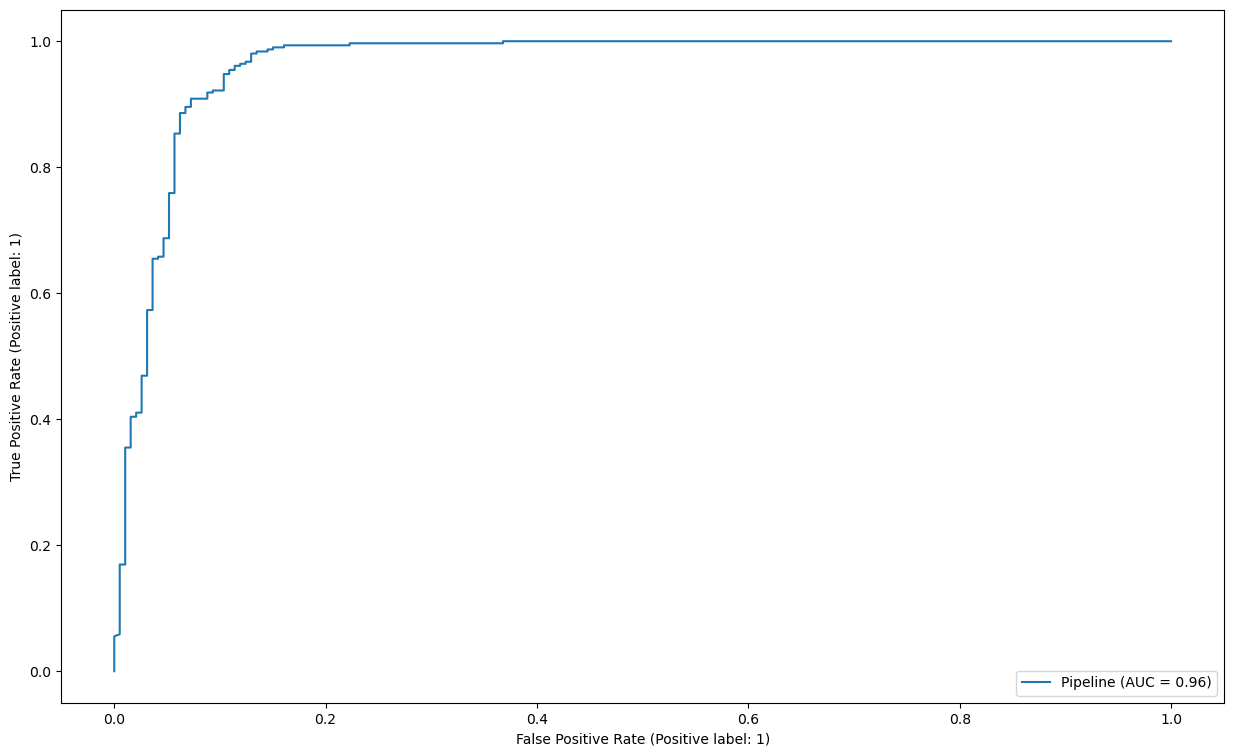

In [109]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)

In [110]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

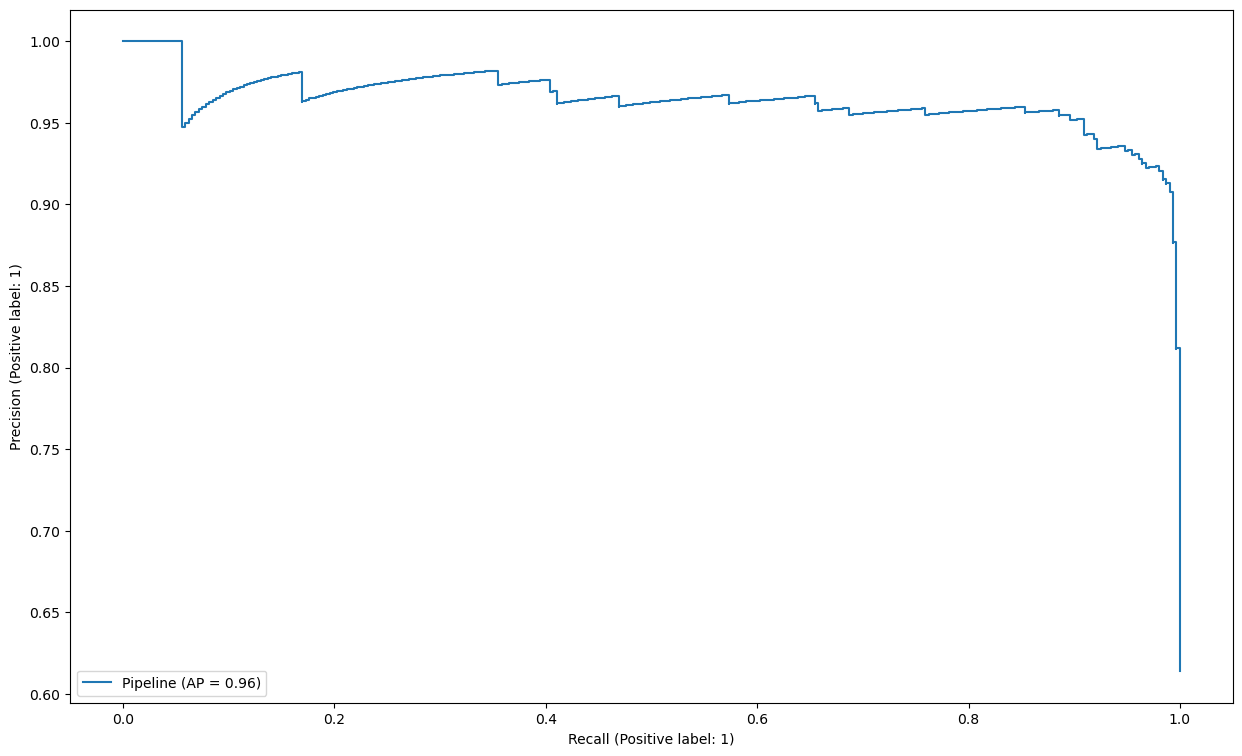

In [112]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

## Final model and deploying the model without the pipeline

In [115]:
scaler = StandardScaler().fit(X)

In [116]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [117]:
X_scaler = scaler.transform(X)

In [118]:
final_model = LogisticRegression().fit(X_scaler, y)

In [119]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [122]:
my_dict = {"age": [20, 30, 40, 50, 60, 70],
           "physical_score": [50, 30, 20, 10, 5, 5]}

In [123]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5
5,70,5


In [124]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [126]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096],
       [ 1.62955943, -3.39825096]])

In [127]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [130]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [131]:
predictions

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [133]:
predictions_proba[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06, 2.40243414e-06])

## Final Model and Model Deployment with Pipeline

In [136]:
operations = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]
final_model = Pipeline(steps=operations)
final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [137]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [138]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [139]:
new_model.predict(sample)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [140]:
new_model.predict_proba(sample)[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06, 2.40243414e-06])

In [142]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,0.999970
1,30,30,1,0.730358
2,40,20,0,0.016181
3,50,10,0,0.000100
4,60,5,0,0.000005
5,70,5,0,0.000002
